# Modelproject: IS-LM Model

For this project, we will utilize a simple IS-LM model for a closed economy. The project is divided into three parts:

**Building the Model:** We will construct the IS-LM model by using substitution and solving functions to derive the IS and LM curves, and then find the equilibrium.

**Parameter Analysis:** In this part, we will assign different parameter values chosen at random to illustrate the curves and equilibrium on graphs. This will allow us to analyze how fiscal and monetary shocks impact the equilibrium.

**Exploring Open Economy Effects:** Finally, we will investigate how opening up the economy influences the equilibrium values.

## Description and model build-up

The model consists of the following equations:

1. **Planned expenditures on goods and services:** $$PE = C + I + \bar{G}$$
2. **Private consumption of goods:** $$C = a + b(Y-\bar{T})$$
3. **Equilibrium in the goods market:** $$Y = PE$$
4. **Investment demand:** $$I = c - d r$$
5. **Equilibrium condition in the money market:** $$\frac{\bar{M}}{\bar{P}} = L$$
6. **Real demand for money:** $$L = e Y - f r$$
7. **Production function:** $$Y = g N$$

Where $PE$ is the planned expenditures on goods and services, $C$ is private demand for consumption, $I$ is investment demand, $\bar{G}$ is public demand for consumption, $\bar{T}$ is a lumpsum tax, $r$ is the real interest rate, $\bar{M}$ is the nominaal money supply, $\bar{P}$ is the consumer price index, $L$ is the real demand for money and $N$ is the workforce. The parameters $a, b, c, d, e, f$ and $g$ are all positive. Further, $b$ is less than 1. A bar over a variable means, that the variable is exogenous. 

Import and set magics

In [319]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for numerical computing
from scipy import optimize
from scipy.optimize import fsolve
import sympy as sp
from IPython.display import display
from ISLM_new import ISLM_alg

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This code performs the following steps:

**Import Necessary Modules**:
   - The `ISLM_alg` class is imported from the `ISLM_new` Python file.
   - The `sympy` library is imported for symbolic mathematics.

**Initialize the Model**:
   - An instance of the `ISLM_alg` class is created and assigned to the variable `model`.

**Derive IS and LM Curve Solutions**:
   - The `derive_IS` method is called to derive solutions for the IS curve.
   - The `derive_LM` method is called to derive solutions for the LM curve.
   - The solutions for the output (Y) and the interest rate (r) are stored in `IS_solution_Y`, `IS_solution_r`, `LM_solution_Y`, and `LM_solution_r`.

**Display IS and LM Curve Solutions**:
   - The solutions for \( Y \) and \( r \) from the IS and LM curves are displayed.


In [320]:
# Initialize the ISLM_alg with symbolic parameters
# Define symbols for the parameters
a, b, c, d, e, f, T, G, M, P = sp.symbols('a b c d e f T G M P')

# Initialize the ISLM_alg class with symbolic parameters
model = ISLM_alg(a, b, c, d, e, f, T, G, M, P)

# Derive the IS curve equation
IS_eq = model.derive_IS()

# Derive the LM curve equation
LM_eq = model.derive_LM()

# Display the IS curve equation
print("IS Curve Equation:")
display(IS_eq)

# Display the LM curve equation
print("LM Curve Equation:")
display(LM_eq)

# Solve for Y in IS and LM equations
IS_solution_Y = sp.solve(IS_eq, model.Y)
LM_solution_Y = sp.solve(LM_eq, model.Y)

# Solve for r in IS and LM equations
IS_solution_r = sp.solve(IS_eq, model.r)
LM_solution_r = sp.solve(LM_eq, model.r)

# Display the IS curve solutions for Y
print("IS Curve Solution (Y):")
if IS_solution_Y:
    for sol in IS_solution_Y:
        display(sp.Eq(model.Y, sol))

# Display the IS curve solutions for r
print("IS Curve Solution (r):")
if IS_solution_r:
    for sol in IS_solution_r:
        display(sp.Eq(model.r, sol))

# Display the LM curve solutions for Y
print("LM Curve Solution (Y):")
if LM_solution_Y:
    for sol in LM_solution_Y:
        display(sp.Eq(model.Y, sol))

# Display the LM curve solutions for r
print("LM Curve Solution (r):")
if LM_solution_r:
    for sol in LM_solution_r:
        display(sp.Eq(model.r, sol))

# Find equilibrium (Y, r) in terms of the parameters
equilibrium = model.find_equilibrium()
print("Equilibrium Solutions:")
if equilibrium:
    for sol in equilibrium:
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))


IS Curve Equation:


LM Curve Equation:


IS Curve Solution (Y):


IS Curve Solution (r):


LM Curve Solution (Y):


LM Curve Solution (r):


Equilibrium Solutions:


**Find and display the equilibrium**:
   - The find_equilibrium method is called to solve the IS and LM equations simultaneously, finding the values of \( Y \) and \( r \) that satisfy both equations.
   - The equilibrium solutions for \( Y \) and \( r \) are displayed, showing where the IS and LM curves intersect.


In [321]:

# Find the equilibrium for Y and r
equilibrium = model.find_equilibrium()

# Display the equilibrium solutions
print("Equilibrium where IS curve Y equals LM curve Y for r:")
if equilibrium:
    for sol in equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")


Equilibrium where IS curve Y equals LM curve Y for r:


## Analysis of IS-LM model

Initial Equilibrium (Y, r):


Optimized Parameter T: 7.492773437500015
New Equilibrium (Y, r) with r = 0.04:


Plotting new IS-LM model with G=1, M=25, and optimized T...


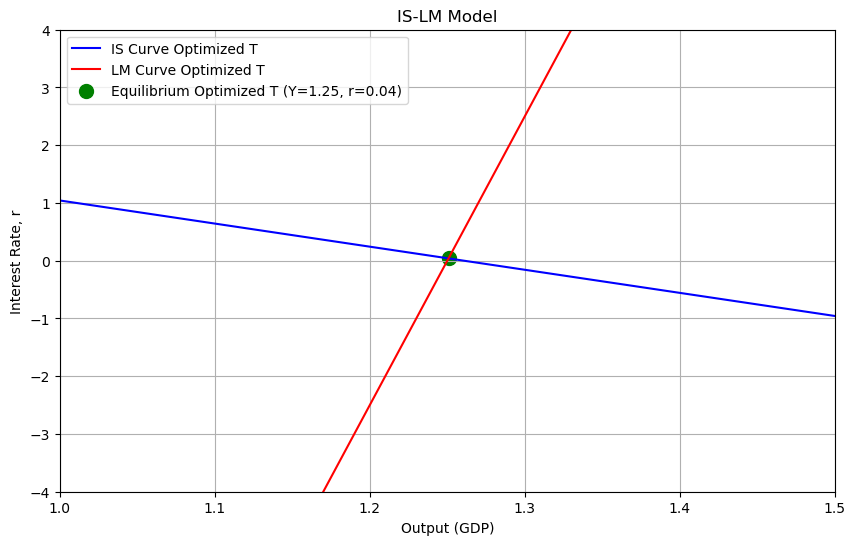

In [322]:
# Initialize the ISLM_alg with specified parameters
model = ISLM_alg(
    a=2, b=0.6, c=2, d=0.1, e=10, f=0.2, T=1, G=1, M=25, P=2
)

# Find initial equilibrium for Y and r
initial_equilibrium = model.find_equilibrium()

# Display the initial equilibrium solutions
print("Initial Equilibrium (Y, r):")
if initial_equilibrium:
    for sol in initial_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Optimize parameter T to ensure r = 0.04
optimized_T = model.optimize_parameters()
print(f"Optimized Parameter T: {optimized_T[0]}")

# Update the model with the optimized T value
model.T = optimized_T[0]

# Find the new equilibrium for Y and r with optimized parameters
new_equilibrium = model.find_equilibrium()

# Display the new equilibrium solutions
print("New Equilibrium (Y, r) with r = 0.04:")
if new_equilibrium:
    for sol in new_equilibrium:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found.")

# Plot the new IS-LM model with optimized T value
print("Plotting new IS-LM model with G=1, M=25, and optimized T...")
new_IS_r_values, new_LM_r_values = model.store_curves(x_range=(1, 1.5), num_points=100)
model.plot(x_range=(1, 1.5), num_points=100, label_suffix='Optimized T', IS_r_values=new_IS_r_values, LM_r_values=new_LM_r_values, equilibrium=new_equilibrium, y_range=(-4, 4))

New Equilibrium (Y, r) with G=1.1:


Comparing IS curves for G=1 and G=1.1...
Comparing IS curves for G=1 and G=1.1...


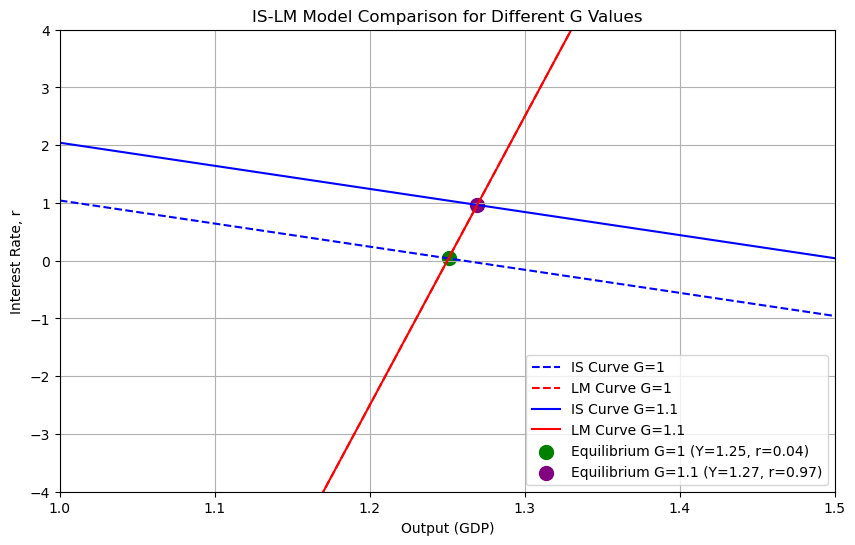

In [323]:
# Update G to 1.1 and find the new equilibrium for Y and r
model.G = 1.1
new_equilibrium_G1_1 = model.find_equilibrium()

# Display the new equilibrium solutions for G=1.1
print("New Equilibrium (Y, r) with G=1.1:")
if new_equilibrium_G1_1:
    for sol in new_equilibrium_G1_1:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found for G=1.1.")

# Compare the IS curves for G=1 and G=1.1
print("Comparing IS curves for G=1 and G=1.1...")
model.compare_G_changes(initial_G=1, new_G=1.1, x_range=(1, 1.5), num_points=100, y_range=(-4, 4))

New Equilibrium (Y, r) with M=27.5:


Comparing IS curves for M=25 and M=27.5...
Comparing IS-LM models for M=25 and M=27.5 with G=1...


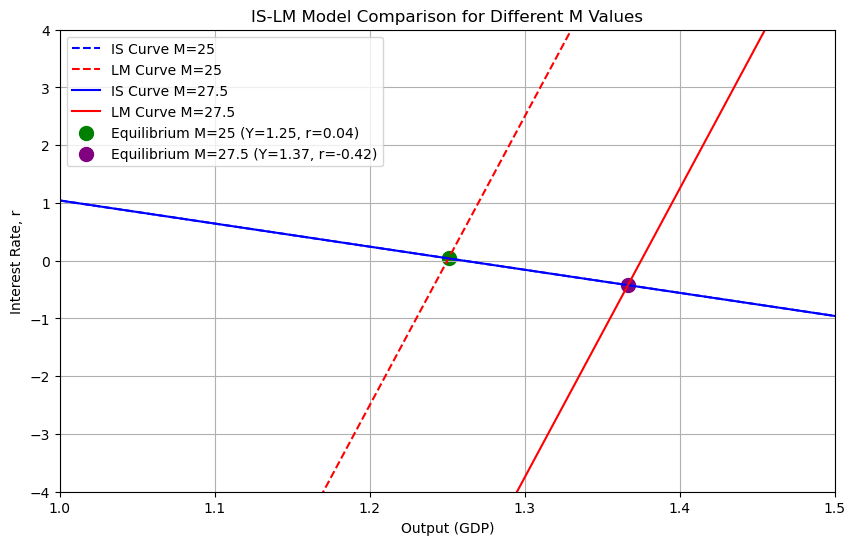

In [324]:
# Update M to 27.5 and find the new equilibrium for Y and r
model.M = 27.5
new_equilibrium_M27_5 = model.find_equilibrium()

# Display the new equilibrium solutions for M=27.5
print("New Equilibrium (Y, r) with M=27.5:")
if new_equilibrium_M27_5:
    for sol in new_equilibrium_M27_5:
        if model.r in sol:
            display(sp.Eq(model.r, sol[model.r]))
        if model.Y in sol:
            display(sp.Eq(model.Y, sol[model.Y]))
else:
    print("No equilibrium found for M=27.5.")

# Compare the IS curves for M=25 and M=27.5
print("Comparing IS curves for M=25 and M=27.5...")
model.compare_M_changes(initial_M=25, new_M=27.5, x_range=(1, 1.5), num_points=100, y_range=(-4, 4))

## Further analysis: Extended IS-LM model